<a href="https://colab.research.google.com/github/hamzabinashraf/Data-Analysis-Projets/blob/main/Coffee_and_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Read**

In [ ]:
data=pd.read_csv('CoffeeAndCodeLT2018.csv')
data.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


**Data Overview**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CodingHours          100 non-null    int64 
 1   CoffeeCupsPerDay     100 non-null    int64 
 2   CoffeeTime           100 non-null    object
 3   CodingWithoutCoffee  100 non-null    object
 4   CoffeeType           99 non-null     object
 5   CoffeeSolveBugs      100 non-null    object
 6   Gender               100 non-null    object
 7   Country              100 non-null    object
 8   AgeRange             98 non-null     object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [ ]:
data.shape

(100, 9)

In [ ]:
data.isnull().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             1
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               2
dtype: int64

In [ ]:
data.describe()

,CodingHours,CoffeeCupsPerDay
count,100.000000,100.000000
mean,6.410000,2.890000
std,2.644205,1.613673
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,2.500000
75%,8.000000,4.000000
max,10.000000,8.000000


In [ ]:
data.duplicated().sum()

3

# Data Cleaning

In [ ]:
df_clean = data.drop_duplicates()

In [ ]:
df_clean = df_clean.dropna()

In [ ]:
df_clean.shape

(94, 9)

In [ ]:
df_clean.isnull().sum()

CodingHours            0
CoffeeCupsPerDay       0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeType             0
CoffeeSolveBugs        0
Gender                 0
Country                0
AgeRange               0
dtype: int64

**Data Visulization**

In [ ]:
df_clean[["Gender","CoffeeCupsPerDay"]].groupby(["Gender"]).mean().sort_values(by="CoffeeCupsPerDay", ascending=False)

,CoffeeCupsPerDay
Gender,
Male,3.117647
Female,2.269231


<ipython-input-27-833075aae477>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="CoffeeCupsPerDay", data=df_clean, palette="dark")


<Axes: xlabel='Gender', ylabel='CoffeeCupsPerDay'>

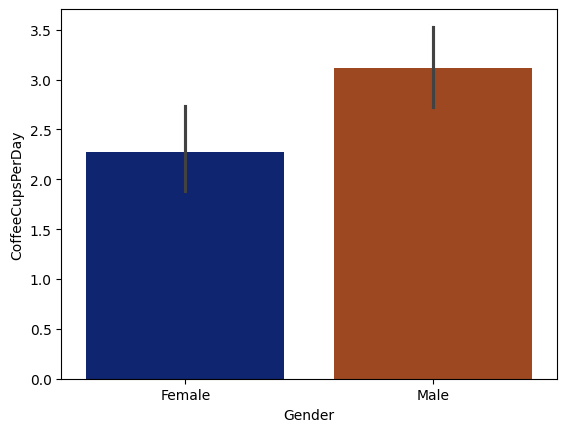

In [ ]:
sns.barplot(x="Gender", y="CoffeeCupsPerDay", data=df_clean, palette="dark")

In [ ]:
coding_hours = pd.DataFrame(df_clean["CodingHours"].value_counts())
Hours_count = coding_hours.reset_index()  #RESET INDEX
# country_count.columns
Hours_count.columns = ['CodingHours', 'count']
Hours_count

,CodingHours,count
0,8,17
1,10,15
2,6,13
3,3,10
4,7,10
5,2,9
6,4,8
7,9,6
8,5,5
9,1,1


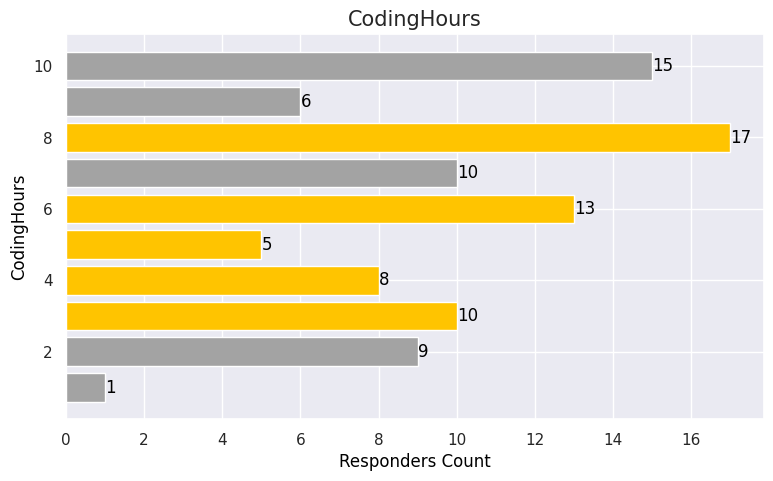

In [ ]:
count = Hours_count.sort_values('count',ascending = True)
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(9)

colors_bright = sns.color_palette('bright')[7:9]
bars = ax.barh(count['CodingHours'],count['count'],  color = colors_bright)
ax.bar_label(bars, color='black')

plt.title('CodingHours', fontsize = 15)
plt.xlabel('Responders Count', color = 'black')
plt.ylabel('CodingHours', color = 'black')
plt.show()

Most of the people code for 8 Hours

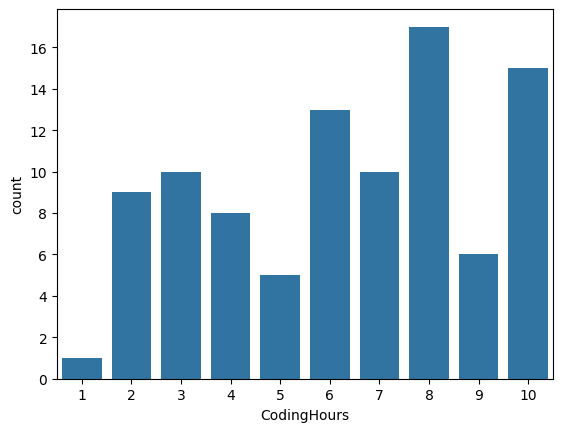

In [ ]:
sns.countplot(x = 'CodingHours',data = df_clean)
plt.show()

In [ ]:
df_clean['CoffeeCupsPerDay'].value_counts()

2    32
3    22
1    15
4    14
5     3
6     3
7     3
8     2
Name: CoffeeCupsPerDay, dtype: int64

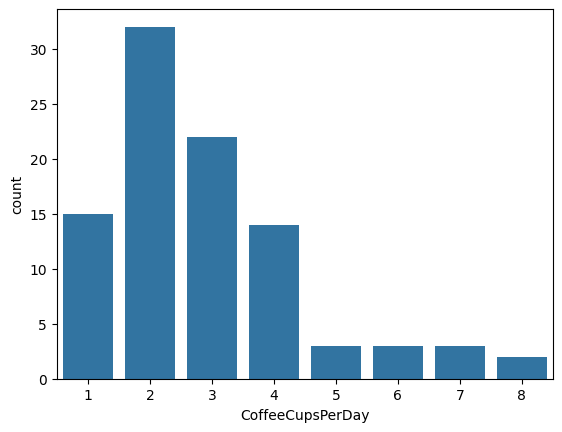

In [ ]:
sns.countplot(x = 'CoffeeCupsPerDay',data = df_clean)
plt.show()

Most of the people drink 2 coffees a day

In [ ]:
df_clean['CoffeeTime'].value_counts()

While coding               57
Before coding              23
Before and while coding     4
All the time                4
In the morning              3
After coding                2
No specific time            1
Name: CoffeeTime, dtype: int64

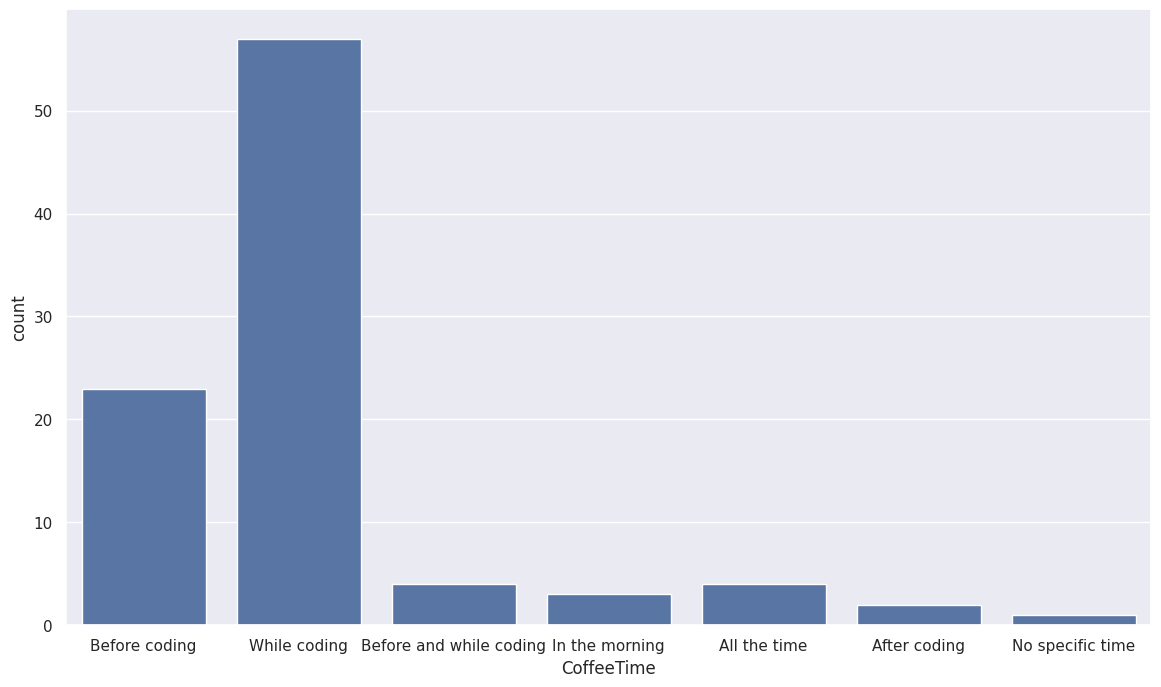

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
colors_hls = sns.color_palette("hls",8 )
sns.countplot(x = 'CoffeeTime',data = df_clean)
plt.show()

Most of people drink coffee While coding

In [ ]:
df_clean['CoffeeType'].value_counts()

Nescafe                     29
American Coffee             22
Turkish                     18
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64

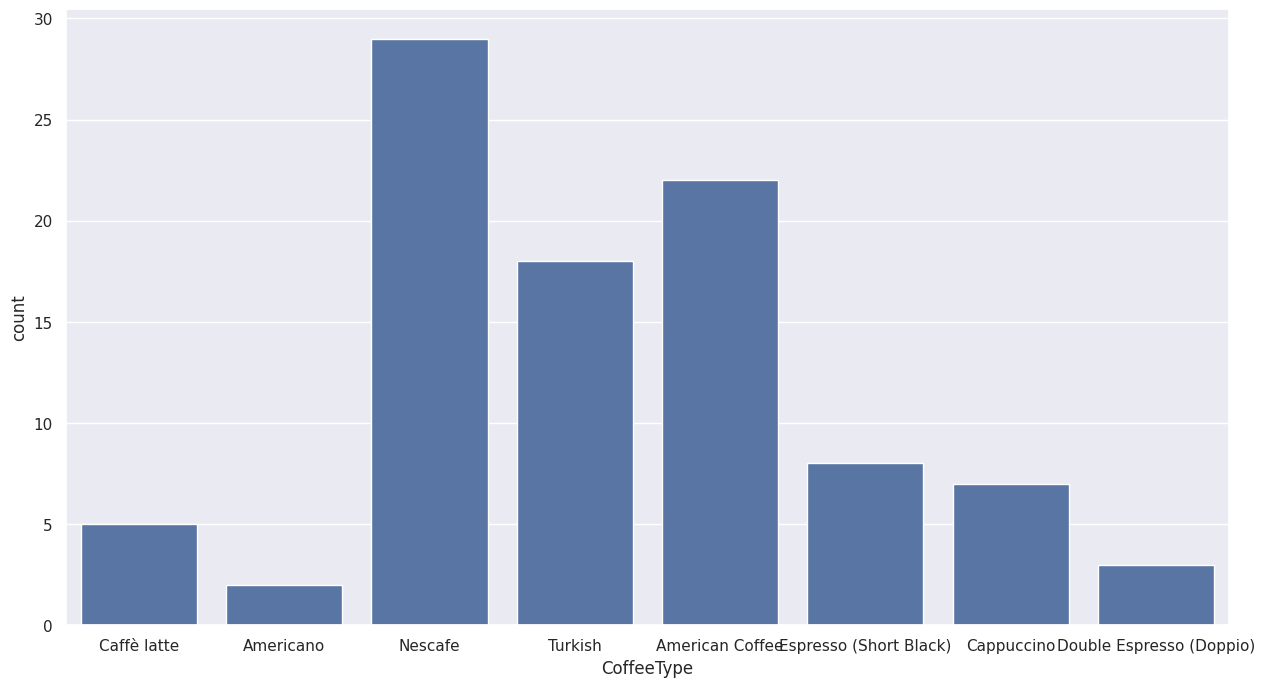

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x = 'CoffeeType',data = df_clean)
plt.show()

Most of people drink NEscafe coffee

In [ ]:
df_clean['CoffeeSolveBugs'].value_counts()

Sometimes    41
Yes          28
No           25
Name: CoffeeSolveBugs, dtype: int64

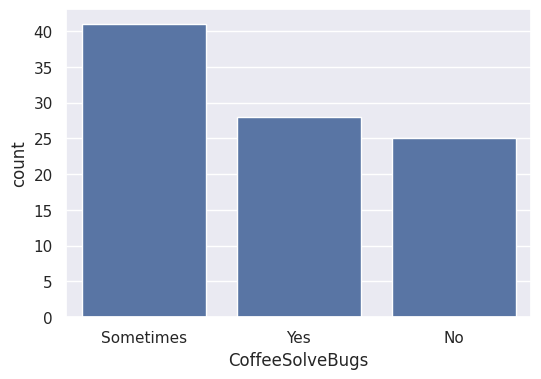

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x = 'CoffeeSolveBugs',data = df_clean)
plt.show()

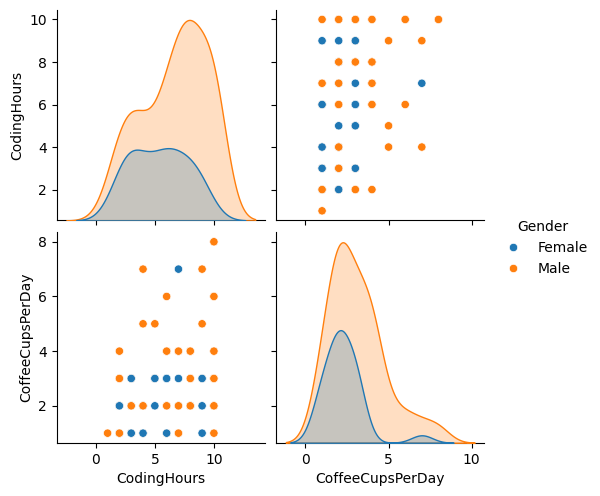

In [ ]:
sns.pairplot(df_clean , hue='Gender')

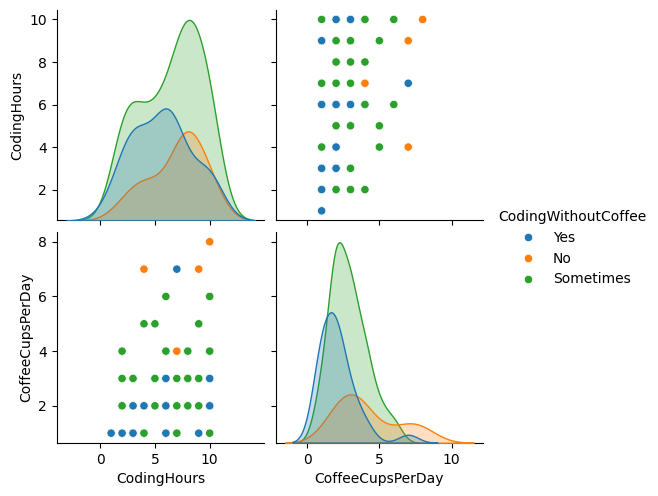

In [ ]:
sns.pairplot(df_clean, hue='CodingWithoutCoffee')


In [ ]:
def count_plot(CoffeTime):

    # get feature
    var = df_clean[CoffeTime]

    #visualization
    plt.figure(figsize=(10,4))
    sns.countplot(x=var, palette="dark", order=var.value_counts().index)
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.title(CoffeTime)
    print("{}".format(var.value_counts()))
    plt.show()

<ipython-input-18-b824d5093bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, palette="dark", order=var.value_counts().index)


While coding               57
Before coding              23
Before and while coding     4
All the time                4
In the morning              3
After coding                2
No specific time            1
Name: CoffeeTime, dtype: int64


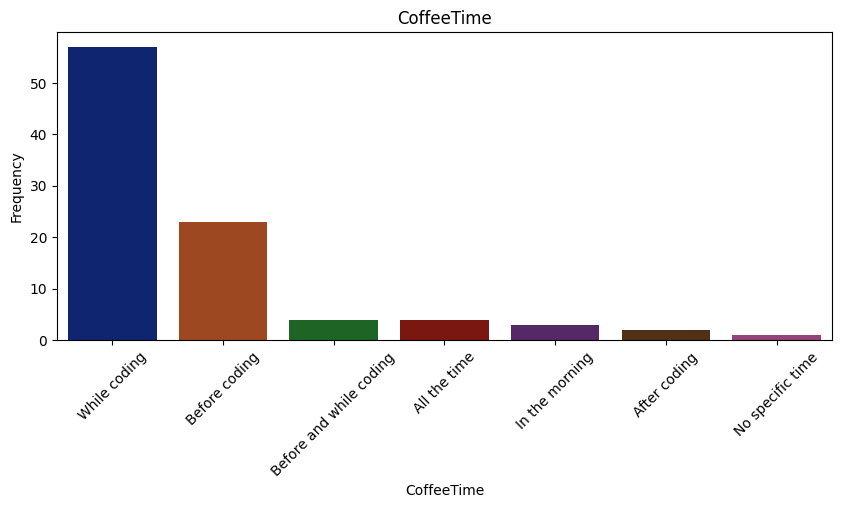

<ipython-input-18-b824d5093bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, palette="dark", order=var.value_counts().index)


Sometimes    48
Yes          28
No           18
Name: CodingWithoutCoffee, dtype: int64


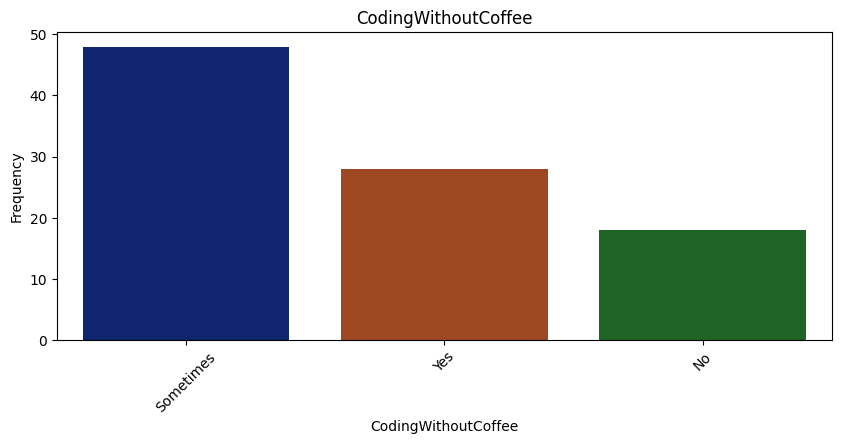

<ipython-input-18-b824d5093bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, palette="dark", order=var.value_counts().index)


Nescafe                     29
American Coffee             22
Turkish                     18
Espresso (Short Black)       8
Cappuccino                   7
Caffè latte                  5
Double Espresso (Doppio)     3
Americano                    2
Name: CoffeeType, dtype: int64


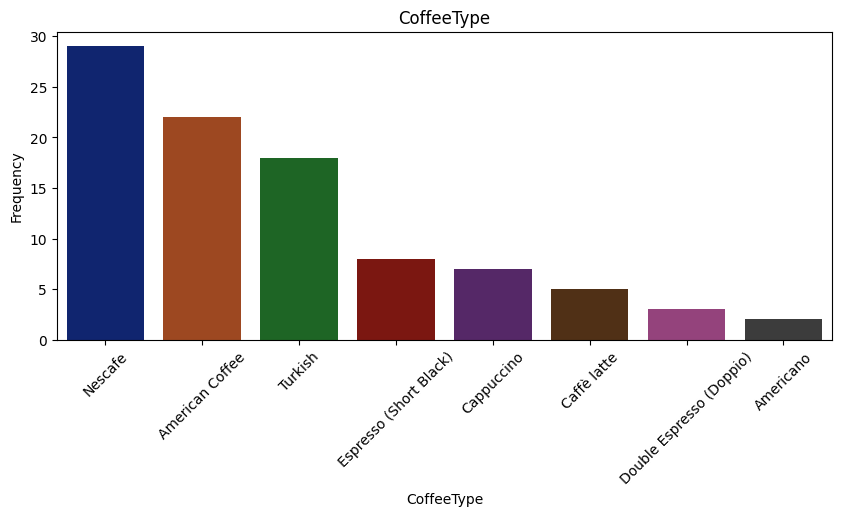

<ipython-input-18-b824d5093bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, palette="dark", order=var.value_counts().index)


Sometimes    41
Yes          28
No           25
Name: CoffeeSolveBugs, dtype: int64


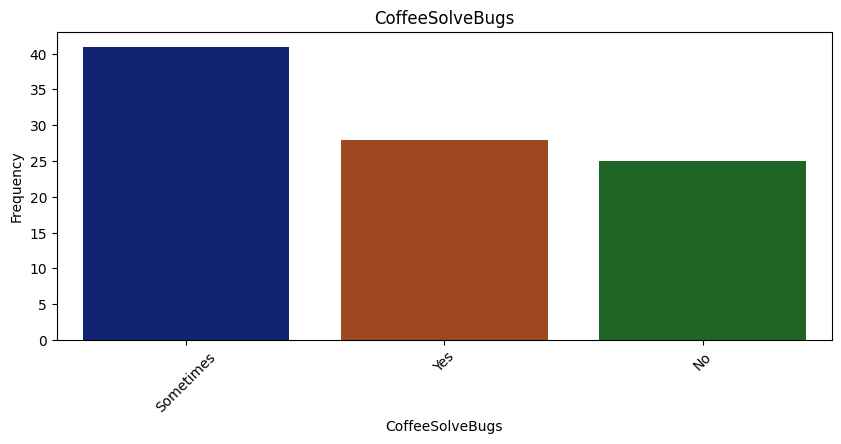

Male      68
Female    26
Name: Gender, dtype: int64


<ipython-input-18-b824d5093bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, palette="dark", order=var.value_counts().index)


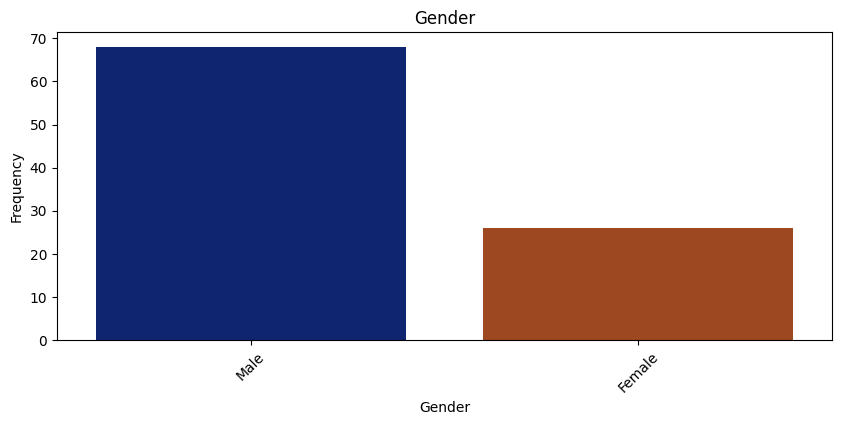

Lebanon    94
Name: Country, dtype: int64


<ipython-input-18-b824d5093bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, palette="dark", order=var.value_counts().index)


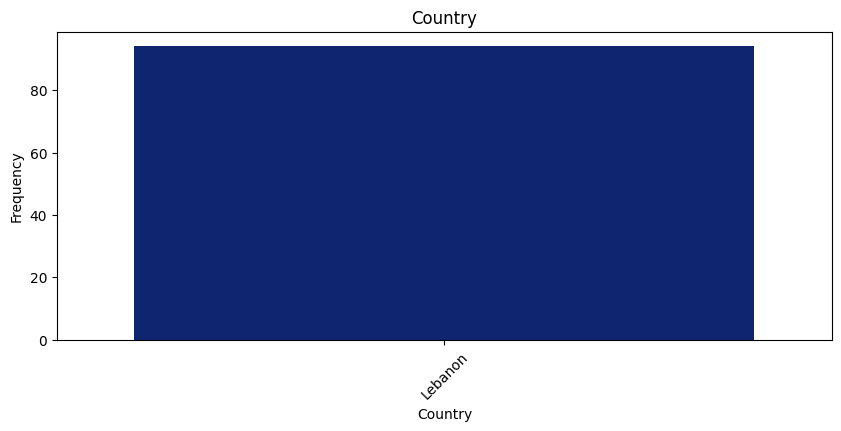

<ipython-input-18-b824d5093bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, palette="dark", order=var.value_counts().index)


18 to 29    59
30 to 39    26
40 to 49     6
Under 18     2
50 to 59     1
Name: AgeRange, dtype: int64


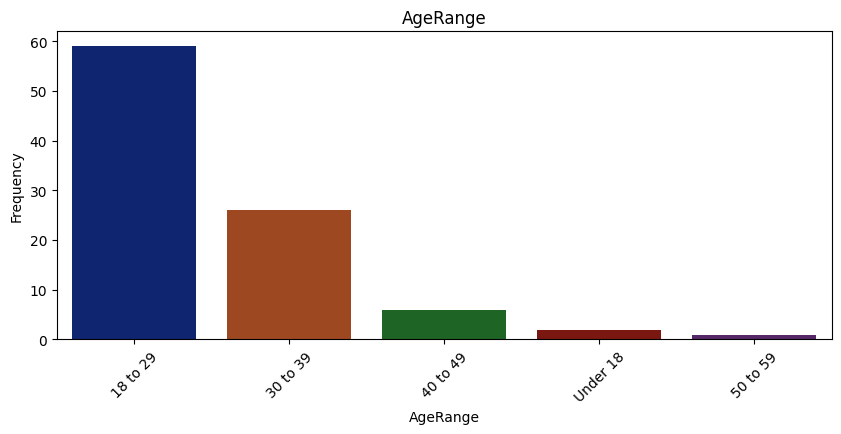

In [ ]:
categorical = ["CoffeeTime", "CodingWithoutCoffee", "CoffeeType", "CoffeeSolveBugs", "Gender", "Country", "AgeRange"]
for i in categorical:
    count_plot(i)